In [ ]:
%pwd

<h3>Neil Liggett</h3>
<h4>BAN 7750-70</h4>
<h4>Import Libraries<br />Read Data</h4>
<p>Inflation Rate data was downloaded from <a href="http://www.in2013dollars.com/us/inflation/1928?amount=1">http://www.in2013dollars.com/us/inflation/1928?amount=1</a></p>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import datetime
rawData = pd.read_excel("histretSP.xls", sheet_name = "S&P 500 & Raw Data", header = 1)
#print(rawData)
TBond = pd.read_excel("histretSP.xls", sheet_name = "T. Bond return", header = 6)
#print(TBond)
TBillRates = pd.read_excel("histretSP.xls", sheet_name = "T. Bill rates", header = 11)
TBillRates = TBillRates.drop(columns = ["Unnamed: 2","Unnamed: 3","Year","Sum","Average"])
# Convert Treasury Bill % to Decimal
TBillRates.VALUE = TBillRates.VALUE / 100
#print(TBillRates)
# Inflation Rate
Inflate = pd.read_excel("inflation_data.xlsx", header = 0)
#print(Inflate)

## 3-Month Treasury Bill: Secondary Market Rate

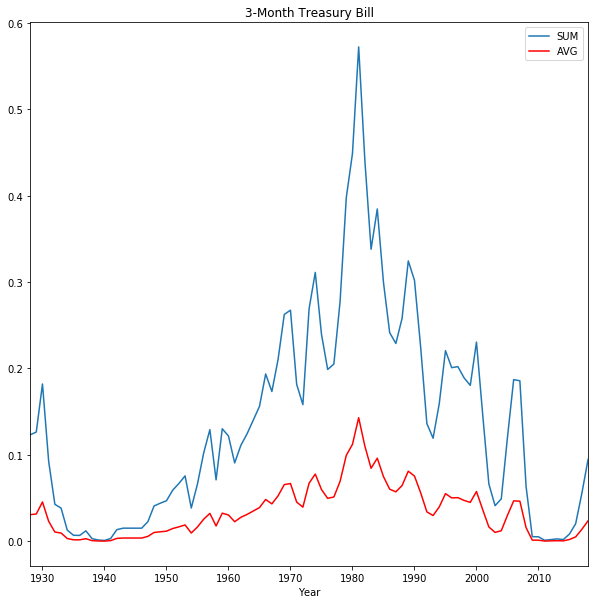

             SUM        AVG
count  91.000000  91.000000
mean    0.137025   0.034256
std     0.121598   0.030400
min     0.001000   0.000250
25%     0.038450   0.009612
50%     0.121800   0.030450
75%     0.203600   0.050900
max     0.572000   0.143000


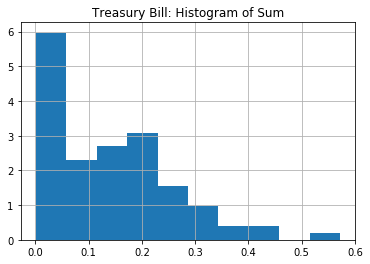

In [23]:
# Get all rows where Months are Jan, Apr, Jul, & Oct
qtrTBill = TBillRates[((TBillRates.Month.dt.month == 1) | (TBillRates.Month.dt.month == 4) | (TBillRates.Month.dt.month == 7) | (TBillRates.Month.dt.month == 10))]
# Add a new column that holds just the year
qtrTBill.insert(0,"Year",qtrTBill.Month.dt.year)
# NOTE: the Groupby function takes the column that we're grouping by and uses it is the index in the resulting dataframe
# Dataframe with the Sum
TBillR = qtrTBill.groupby("Year").VALUE.sum().to_frame("SUM")
# Dataframe with the Average
TBillR2 = qtrTBill.groupby("Year").VALUE.mean().to_frame("AVG")
# Join the two dataframes by Year, using an inner join
TBillR = TBillR.join(TBillR2, on = "Year", how = "inner")
# Move the Year index into the columns of the dataframe, so we may use it for plotting
TBillR["Year"] = TBillR.index
# Prepend first 6 years to TBillR
#SUM = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
AVG = np.array([0.0308,0.0316,0.0455,0.0231,0.0107,0.0096])
SUM = np.array([0.0308,0.0316,0.0455,0.0231,0.0107,0.0096]) * 4
Year = np.array([1928,1929,1930,1931,1932,1933])
df = pd.DataFrame({"SUM": SUM, "AVG": AVG, "Year": Year}, index = Year)
TBillR = df.append(TBillR)
# Append the last 9 years to TBillR
#SUM = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
AVG = np.array([0.0013, 0.0003, 0.0005, 0.0007, 0.0005, 0.0021, 0.0051, 0.0139, 0.0237])
SUM = np.array([0.0013, 0.0003, 0.0005, 0.0007, 0.0005, 0.0021, 0.0051, 0.0139, 0.0237]) * 4
Year = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
df = pd.DataFrame({"SUM": SUM, "AVG": AVG, "Year": Year}, index = Year)
TBillR = TBillR.append(df)
#print(TBillR)
plt.figure(figsize=(10,10))
ax = plt.gca() # Get Current Axis
TBillR.plot(kind = "line",x = "Year", y = "SUM", ax = ax)
TBillR.plot(kind = "line",x = "Year", y = "AVG", color = "Red", ax = ax)
plt.title("3-Month Treasury Bill")
plt.show()
print(TBillR[["SUM","AVG"]].describe())

TBillR.SUM.hist(density = True)
plt.title("Treasury Bill: Histogram of Sum")
plt.show()
#TBRates.AVG.hist(density = True, ax = ax)
#plt.title("Treasury Bill: Histogram of Mean")
#plt.show()
#print(TBillR[["SUM","AVG"]].describe())

## Annual Returns Re-Calculation

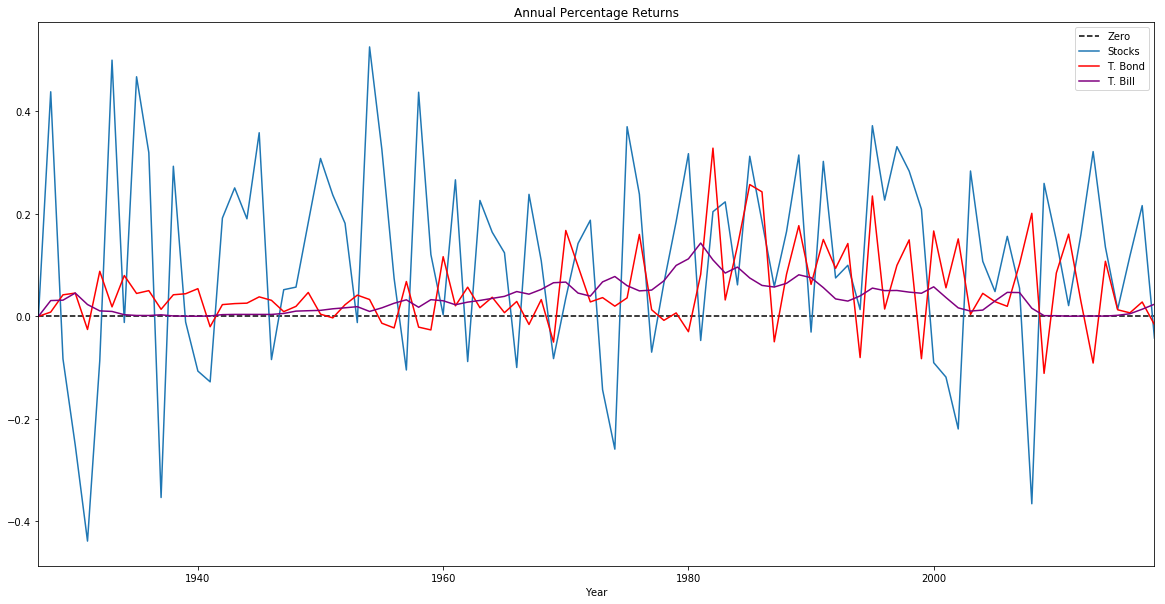

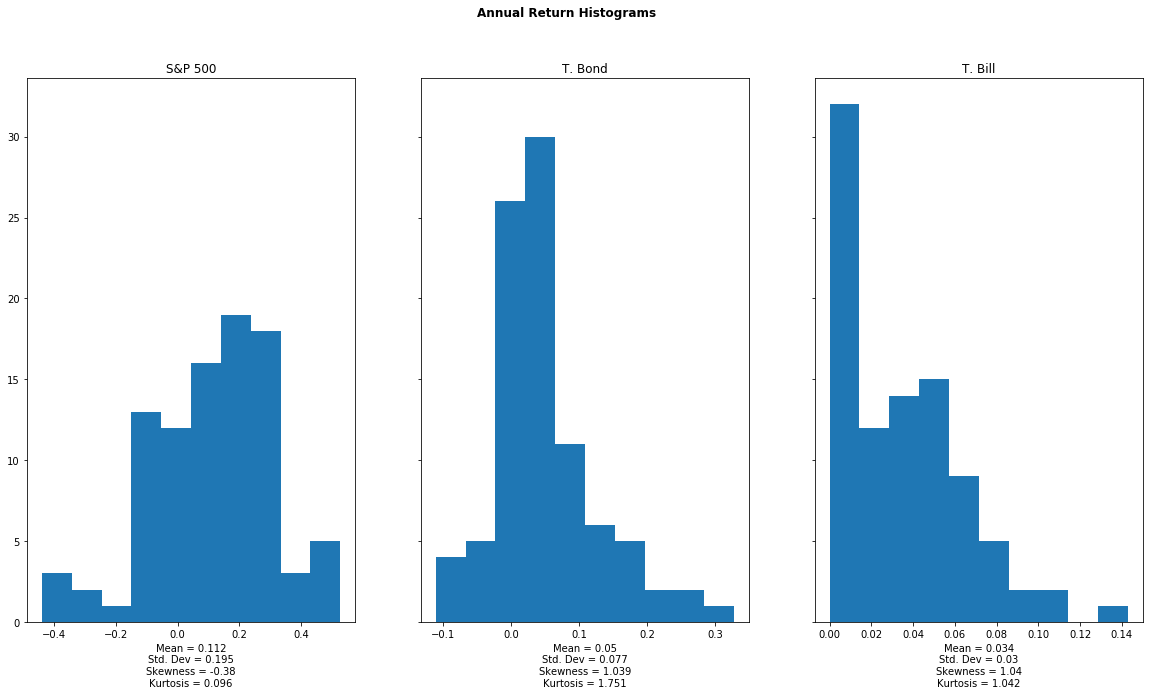

In [24]:
#rawData["S&P 500"][1]
# Create new column for S&P 500 Annual Percentage Return
rawData["SandPRet"] = float(0)
# Create new column for Treasury Bond Annual Percentage Return
rawData["TBondRet"] = float(0)
# Create new column for Treasury Bull Annual Percentage Return
rawData["TBillRet"] = float(0)
for r in range(1, len(rawData)):
    #rawData.loc[r,"SandPRet"] = ((rawData.loc[r,"S&P 500"] - rawData.loc[r - 1,"S&P 500"] + rawData.loc[r,"Dividends"]) / rawData.loc[r - 1,"S&P 500"])
    rawData.loc[r, "SandPRet"] = ((rawData.loc[r,"S&P 500"] - rawData.loc[r - 1,"S&P 500"] + (rawData.loc[r,"S&P 500"] * rawData.loc[r,"Dividend Yield"])) / rawData.loc[r - 1,"S&P 500"])
    # From Excel ((E3*(1-(1+E4)^(-10))/E4+1/(1+E4)^10)-1)+E3
    rawData.loc[r, "TBondRet"] = (((rawData.loc[r - 1, "T.Bond rate"] * (1 - (1 + rawData.loc[r, "T.Bond rate"])**(-10)) / rawData.loc[r, "T.Bond rate"] + 1 / (1 + rawData.loc[r,"T.Bond rate"])**10) - 1) + rawData.loc[r - 1,"T.Bond rate"])
    #print(rawData.loc[r,"Year"])
    rawData.loc[r, "TBillRet"] = TBillR[(TBillR.Year == rawData.loc[r,"Year"])].AVG.values
    #print(TBillR[(TBillR.Year == rawData.loc[r,"Year"])].AVG.values)
    #print(rawData.loc[r,"Year"])

#rawData[["Year","SandPRet","TBondRet","AVG"]]
#rawData
plt.figure(figsize=(20,10))
ax = plt.gca() # Get Current Axis
# Create a Column of all zeroes
rawData["ZERO"] = float(0)
rawData.plot(kind = "line", linestyle = "dashed",x = "Year", y = "ZERO", color = "Black", ax = ax, label = "Zero")
rawData.plot(kind = "line",x = "Year", y = "SandPRet", ax = ax, label = "Stocks")
rawData.plot(kind = "line",x = "Year", y = "TBondRet", color = "Red", ax = ax, label = "T. Bond")
rawData.plot(kind = "line",x = "Year", y = "TBillRet", color = "Purple", ax = ax, label = "T. Bill")
plt.title("Annual Percentage Returns")
plt.show()

#rawData[["Year","SandPRet","TBondRet","TBillRet"]]

fig, plots = plt.subplots(1, 3, sharey = True)
# Set Figure Title
fig.suptitle("Annual Return Histograms", fontweight = "bold")
fig.set_size_inches(20,10)
plots[0].hist(rawData.SandPRet)
plots[0].set_title("S&P 500")
plots[0].set_xlabel("Mean = " + str(round(rawData.SandPRet.mean(),3)) + "\nStd. Dev = " + str(round(rawData.SandPRet.std(),3)) + "\nSkewness = " + str(round(rawData.SandPRet.skew(),3)) + "\nKurtosis = " + str(round(rawData.SandPRet.kurtosis(),3)))
#plots[0].set_ylabel("Y")
plots[1].hist(rawData.TBondRet)
plots[1].set_title("T. Bond")
plots[1].set_xlabel("Mean = " + str(round(rawData.TBondRet.mean(),3)) + "\nStd. Dev = " + str(round(rawData.TBondRet.std(),3)) + "\nSkewness = " + str(round(rawData.TBondRet.skew(),3)) + "\nKurtosis = " + str(round(rawData.TBondRet.kurtosis(),3)))
plots[2].hist(rawData.TBillRet)
plots[2].set_title("T. Bill")
plots[2].set_xlabel("Mean = " + str(round(rawData.TBillRet.mean(),3)) + "\nStd. Dev = " + str(round(rawData.TBillRet.std(),3)) + "\nSkewness = " + str(round(rawData.TBillRet.skew(),3)) + "\nKurtosis = " + str(round(rawData.TBillRet.kurtosis(),3)))
#plots[1].scatter(list(range(len(b))), b, c = "red")
#plots[1].set_title("Uniform Distribution")
#plt.xlabel("X")
#plt.ylabel("Y")
plt.show()

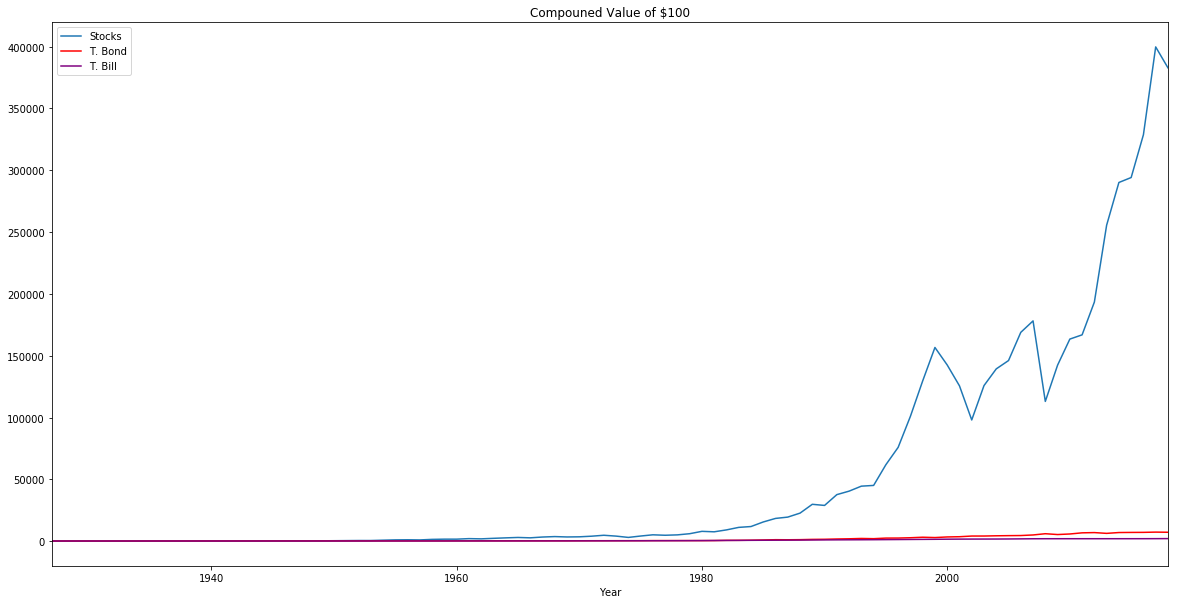

,SandPComp,TBondComp,TBillComp
count,92.000000,92.000000,92.000000
mean,52310.098768,1637.182878,694.261578
std,91288.813921,2224.875811,707.077937
min,50.664911,100.000000,100.000000
25%,334.660493,198.618069,123.983722
50%,4045.082502,365.996125,263.587618
75%,65344.564352,2486.399055,1260.781331
max,399768.635072,7309.873866,2063.424406


In [26]:
initInvest = 100
# Create new column for S&P 500 Compounded Value
rawData["SandPComp"] = float(0)
rawData.loc[0, "SandPComp"] = initInvest
# Create new column for Treasury Bond Compounded Value
rawData["TBondComp"] = float(0)
rawData.loc[0, "TBondComp"] = initInvest
# Create new column for Treasury Bill Compounded Value
rawData["TBillComp"] = float(0)
rawData.loc[0, "TBillComp"] = initInvest
#########################################################
rawData["InflationRate"] = float(0)
# Create new column for S&P 500 Real Return
rawData["SandPRRet"] = float(0)
rawData.loc[0, "SandPRRet"] = rawData.loc[0, "SandPRet"]
# Create new column for Treasury Bond Real Return
rawData["TBondRRet"] = float(0)
rawData.loc[0, "TBondRRet"] = rawData.loc[0, "TBondRet"]
# Create new column for Treasury Bill Real Return
rawData["TBillRRet"] = float(0)
rawData.loc[0, "TBillRRet"] = rawData.loc[0, "TBillRet"]
#########################################################
for r in range(1, len(rawData)):
    # Grab Inflation Rate from Inflation Rate data frame
    rawData.loc[r, "InflationRate"] = Inflate[Inflate.Year == rawData.loc[r, "Year"]].Inflation_Rate.values
    # Calculate compounded Value, based on S&P500 Annual Return
    rawData.loc[r, "SandPComp"] = rawData.loc[r - 1, "SandPComp"] * (1 + rawData.loc[r,"SandPRet"])
     # Calculate Real Return for S&P500, using Inflation Rate
    rawData.loc[r, "SandPRRet"] = (1 + rawData.loc[r,"SandPRet"]) / ( 1 + rawData.loc[r,"InflationRate"]) - 1
    # Calculate compounded Value, based on Treasury Bond Annual Return
    rawData.loc[r, "TBondComp"] = rawData.loc[r - 1, "TBondComp"] * (1 + rawData.loc[r,"TBondRet"])
     # Calculate Real Return for Treasury Bond, using Inflation Rate
    rawData.loc[r, "TBondRRet"] = (1 + rawData.loc[r,"TBondRet"]) / ( 1 + rawData.loc[r,"InflationRate"]) - 1
    # Calculate compounded Value, based on Treasury Bill Annual Return
    rawData.loc[r, "TBillComp"] = rawData.loc[r - 1, "TBillComp"] * (1 + rawData.loc[r,"TBillRet"])
    # Calculate Real Return for Treasury Bill, using Inflation Rate
    rawData.loc[r, "TBillRRet"] = (1 + rawData.loc[r,"TBillRet"]) / ( 1 + rawData.loc[r,"InflationRate"]) - 1

plt.figure(figsize=(20,10))
ax = plt.gca() # Get Current Axis
rawData.plot(kind = "line",x = "Year", y = "SandPComp", ax = ax, label = "Stocks")
rawData.plot(kind = "line",x = "Year", y = "TBondComp", color = "Red", ax = ax, label = "T. Bond")
rawData.plot(kind = "line",x = "Year", y = "TBillComp", color = "Purple", ax = ax, label = "T. Bill")
plt.title("Compouned Value of $" + str(initInvest))
#plt.figure(figsize=(20, 20))
plt.show()
rawData[["SandPComp","TBondComp","TBillComp"]].describe()
#rawData[["Year","SandPComp","TBondComp","TBillComp"]]

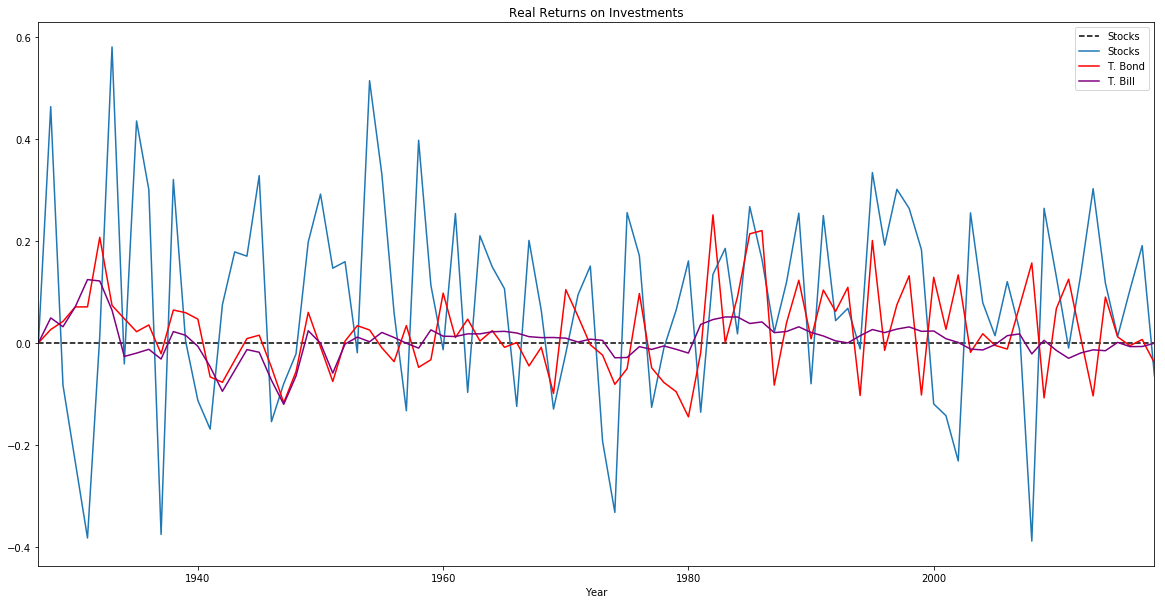

In [27]:
plt.figure(figsize=(20,10))
ax = plt.gca() # Get Current Axis
rawData.plot(kind = "line", linestyle = "dashed", x = "Year", y = "ZERO", color = "Black", ax = ax, label = "Stocks")
rawData.plot(kind = "line", x = "Year", y = "SandPRRet", ax = ax, label = "Stocks")
rawData.plot(kind = "line", x = "Year", y = "TBondRRet", color = "Red", ax = ax, label = "T. Bond")
rawData.plot(kind = "line", x = "Year", y = "TBillRRet", color = "Purple", ax = ax, label = "T. Bill")
plt.title("Real Returns on Investments")
plt.show()